# N queens (now with heuristics)

The N Queen is the problem of placing N chess queens on an N×N chessboard so that no two queens attack each other.

For example, the following is a solution for the 4 Queen problem.

![Solution-Of-4-Queen-Problem.png](https://media.geeksforgeeks.org/wp-content/uploads/20230814111654/Solution-Of-4-Queen-Problem.png)

The expected output is in the form of a matrix that has ‘Q‘s for the blocks where queens are placed and the empty spaces are represented by ‘.’ . For example, the following is the output matrix for the above 4-Queen solution.


In [2]:
def are_visible(pos1: tuple[int, int], pos2: tuple[int, int]) -> bool:
    """Given two positions, it returns if the queens are visible to each other"""
    x1, y1 = pos1
    x2, y2 = pos2

    return x1 == x2 or y1 == y2 or abs(x1 - x2) == abs(y1 - y2)


def is_safe(board: list[list], pos: tuple[int, int]) -> bool:
    """Given a board configuration and a position, it returns if the position will fit in the board"""
    for y, row in enumerate(board):
        try:
            queen_x = row.index(1)
            if are_visible((queen_x, y), pos):
                return False

        except ValueError:
            # no queen in the current row, break the loop.
            break

    return True

In [3]:
def validate_result(queens: list) -> bool:
    """Validate if a queens configuration is valid"""
    board = [[0 for _ in range(len(queens))] for _ in range(len(queens))]

    for y, x in enumerate(queens):
        if not is_safe(board, (x, y)):
            return False

        board[y][x] = 1

    return True


result = [1, 3, 0, 2]
print("Result is valid:", validate_result(result))

Result is valid: True


In [4]:
def draw_board(queens: list) -> str:
    """Print the chessboard in order to visualize the result visually

    Example: [0, 1, 2, 3] for queens located in (0,0), (1,1), (2,2), (3,3)
    """
    res = []
    board = []
    for queen_pos in queens:
        row = []
        for col in range(len(queens)):
            row.append("Q" if col == queen_pos else " ")
        board.append(row)

    for row in board:
        res.append("| " + " | ".join(row) + " | ")

    return "\n".join(res)


result = [1, 3, 0, 2]
print(draw_board(result))

|   | Q |   |   | 
|   |   |   | Q | 
| Q |   |   |   | 
|   |   | Q |   | 


In [94]:
def place_queen(board: list[list], y: int) -> bool:
    # We reached the end of the board, therefore all the queens are placed
    if y >= len(board):
        return True

    for x in range(len(board)):
        possible_queen = (x, y)
        if is_safe(board, possible_queen):
            # Place queen in board
            board[y][x] = 1

            # Move to the next row
            if place_queen(board, y + 1):
                return True

            # rollback last queen placed
            board[y][x] = 0

    # if no queen can be placed in the row we go back
    return False


def n_queens_classic(amount: int) -> list:
    """Given an amount of queens should return the configuration of queens

    Result is provided as list of the queens position: [1, 3, 0, 2]
    The index in array represents the row and the value is the column
    """
    # validation of entry params
    if amount < 1:
        raise Exception("amount should be bigger than 1")

    # generate nxn board based on given amount
    board = [[0 for _ in range(amount)] for _ in range(amount)]

    if place_queen(board, 0) == False:
        raise Exception(
            f"There is no possible solution for the given board: {amount}x{amount}"
        )

    res = [row.index(1) for row in board]
    return res


result = n_queens_classic(20)
print("Valid Result: ", validate_result(result))
print(draw_board(result))

Valid Result:  True
| Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | 
|   |   | Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | 
|   |   |   |   | Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | 
|   | Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | 
|   |   |   | Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   |   |   |   |   |   | Q |   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q |   |   |   |   |   | 
|   |   |   |   |   |   |   |   |   |   |   | Q |   |   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q |   |   | 
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q | 
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q |   |   |   | 
|   |   |   |   |   |   |   |   | Q |   |   |   |   |   |   |   |  

In [96]:
def are_queen_visible(pos1: tuple[int, int], pos2: tuple[int, int]) -> bool:
    """Given two positions, it returns if the queens are visible to each other"""
    x1, y1 = pos1
    x2, y2 = pos2
    return x1 == x2 or y1 == y2 or abs(x1 - x2) == abs(y1 - y2)


def get_distance(res: list) -> int:
    """The distance is given by the amount of queens attacking to each other, the more they attack, the bigger the distance"""
    dist = 0

    rows = set(range(len(res)))

    for currY, currX in enumerate(res):
        for y in list(rows - {currY}):
            dist += int(are_queen_visible((res[y], y), (currX, currY)))

    return dist

In [126]:
import random
import math


def get_closest(res: list) -> list:
    i, j = sorted(random.sample(range(1, len(res)), 2))

    aux = res[:]
    aux[i], aux[j] = aux[j], aux[i]
    return aux


def probability(temp: int, dist: int) -> bool:
    return random.random() < math.exp(-1 * dist / temp)


def dec_temp(temp: int) -> int:
    return temp * 0.995


# Using Simulated Annealing heuristic --> https://en.wikipedia.org/wiki/Simulated_annealing
def n_queens_SA(n: int, temp=10000000) -> list:
    curr_res = list(range(n))
    curr_res_dist = get_distance(curr_res)

    best_res = curr_res
    best_rest_dist = curr_res_dist

    N = 0
    while temp > 0.0001:
        N += 1

        closest = get_closest(curr_res)
        closest_dist = get_distance(closest)

        if closest_dist < best_rest_dist:
            best_res = closest
            best_rest_dist = closest_dist

        if closest_dist < curr_res_dist or probability(
            temp, abs(curr_res_dist - closest_dist)
        ):
            curr_res = closest
            curr_res_dist = closest_dist

        temp = dec_temp(temp)

    return best_res


result = n_queens_SA(20)
print(validate_result(result))
print(draw_board(result))

True
| Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q |   |   | 
|   |   |   |   |   |   |   |   |   |   |   | Q |   |   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   |   |   |   |   |   |   | Q |   |   |   |   |   |   | 
|   |   |   |   |   |   |   |   |   |   | Q |   |   |   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   | Q |   |   |   |   |   |   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   |   |   | Q |   |   |   |   |   |   |   |   |   |   | 
|   |   |   | Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q | 
|   |   | Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | 
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q |   |   |   |   | 
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   | Q |   | 

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

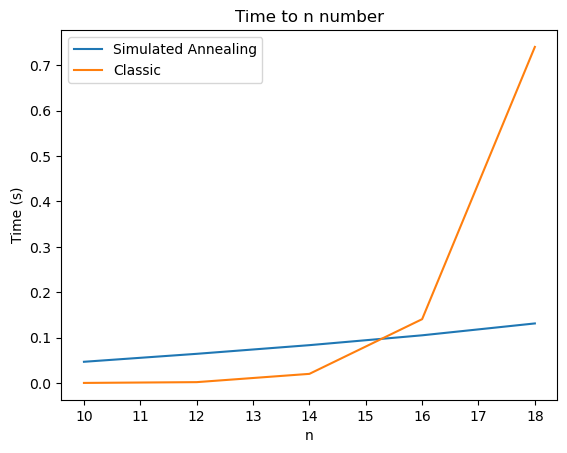

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit

execution_time_classic = []
execution_time_sa = []
input_sizes = list(range(10, 20, 2))

for n in input_sizes:
    execution_time_sa.append(timeit(lambda: n_queens_SA(n), number=1))
    execution_time_classic.append(timeit(lambda: n_queens_classic(n), number=1))

sns.lineplot(x=input_sizes, y=execution_time_sa, label="Simulated Annealing")
sns.lineplot(x=input_sizes, y=execution_time_classic, label="Classic")

plt.xlabel("n")
plt.ylabel("Time (s)")
plt.title("Time to n number")

plt.show()

,temp_modif,count
0,0.900,2
1,0.990,8
2,0.999,10


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


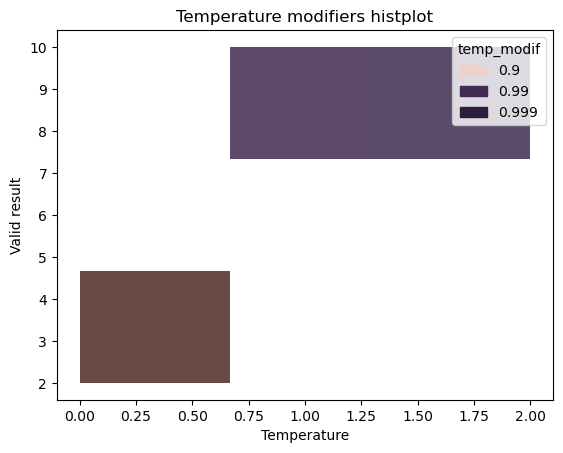

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(
    [
        {
            'temp_modif': 0.9,
            'count': 0
        },
        {
            'temp_modif': 0.99,
            'count': 0
        },
        {
            'temp_modif': 0.999,
            'count': 0
        },
    ]
)

try_amount = 10
queens_amount = 10

for i, row in df.iterrows():
    # using shadowing of function I can alter the internal behavior of the temperature
    def dec_temp(temp: int) -> int:
        return temp * row['temp_modif']

    count = 0
    for _ in range(try_amount):
        res = n_queens_SA(queens_amount)
        count += int(validate_result(res))

    df.at[i, 'count'] = count
display(df)
sns.histplot(
    data=df.reset_index(),
    x='index',
    y='count',
    hue="temp_modif",
)

plt.xlabel("Temperature")
plt.ylabel("Valid result")
plt.title("Temperature modifiers histplot")

plt.show()